<a href="https://colab.research.google.com/github/olesjaeidelman/Unit2-Assignment/blob/main/Project_Unit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [2]:
#Import all libraries that will be used for analysis
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [4]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [6]:
df.shape
#There are 212,331 rows in data set with 15 columns

(212331, 15)

In [7]:
df.count()
#Summary below shows that all data points have values populated; there are no columns that have no data

School DBN                     212331
School Name                    212331
School Level                   212331
Regents Exam                   212321
Year                           212331
Total Tested                   212331
Mean Score                     212331
Number Scoring Below 65        212331
Percent Scoring Below 65       212331
Number Scoring 65 or Above     212331
Percent Scoring 65 or Above    212331
Number Scoring 80 or Above     212331
Percent Scoring 80 or Above    212331
Number Scoring CR              212331
Percent Scoring CR             212331
dtype: int64

In [8]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [ ]:
df['Mean Score'].mean()
#Error indicates that there are non-numeric values in the Mean Score column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fd8b65110>,
      dtype=object)

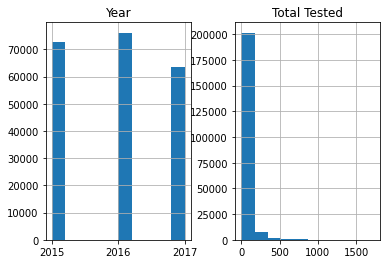

In [10]:
df.hist()

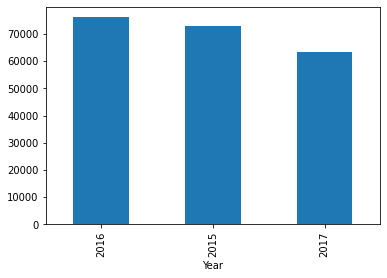

In [11]:
df.groupby(['Year'])['Total Tested'].count().sort_values(ascending = False).plot(kind = 'bar')
#2016 was the year with the most tests volume

In [12]:
df.groupby(['Year', 'School Name'])['Total Tested'].sum().sort_values(ascending = False)

Year  School Name                          
2016  Brooklyn Technical High School           61565
2015  Brooklyn Technical High School           60395
      Bayside High School                      57510
2017  Brooklyn Technical High School           56600
2015  Francis Lewis High School                55200
                                               ...  
2017  University Neighborhood Middle School        5
2015  P.S. 202 Ernest S. Jenkyns                   5
      West Prep Academy                            5
2016  Riverdale Avenue Middle School               5
      Academy for New Americans                    5
Name: Total Tested, Length: 2778, dtype: int64

In [13]:
#I want to explore how much better  math-specialty schools do at some math exams when compared to not math schools?
#I will be comparing percent scoring across different schools, so I will not be interested in number scoring fields
#I am noticing a lot of "s" values, which I assume identifies "satisfactory" score, I will remove those records from my analysis

df[df['School Name'].str.contains('Math')]
#There are 6,807 rows of data with the school name containing word "Math"; there are multiple rows per year per test, so will need more work to determine unique number of math schools

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
192,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Algebra2/Trigonometry,2015,180,80.7,21,11.7,159,88.3,108,60,108,60
193,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Algebra2/Trigonometry,2016,175,80.6,23,13.1,152,86.9,102,58.3,102,58.3
194,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2015,74,78.3,6,8.1,68,91.9,34,45.9,67,90.5
195,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2016,207,83.1,9,4.3,198,95.7,159,76.8,193,93.2
196,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2017,179,84.8,12,6.7,167,93.3,147,82.1,166,92.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211965,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,5,s,s,s,s,s,s,s,na,na
211966,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,46,67.6,18,39.1,28,60.9,10,21.7,na,na
211967,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,60,63.2,30,50,30,50,9,15,na,na
211968,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,9,65.3,3,33.3,6,66.7,2,22.2,na,na


In [14]:
#Check what kind of tests were conducted
df.groupby(['Regents Exam'])['Total Tested'].sum().sort_values(ascending = False)

Regents Exam
Common Core Algebra                1568225
Global History and Geography       1435810
Living Environment                 1416520
U.S. History and Government        1201285
Common Core English                1071595
Common Core Geometry                730950
Physical Settings/Earth Science     625675
Physical Settings/Chemistry         454495
English                             439705
Algebra2/Trigonometry               364645
Integrated Algebra                  362310
Geometry                            300675
Common Core Algebra2                295560
Physical Settings/Physics           213650
Name: Total Tested, dtype: int64

In [15]:
#Find out how much duplication we have in this file
df[df.duplicated(keep=False)]
#Based on total below, there are 39902 rows that are duplicated and will need to be removed from analysis

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212316,84X706,Harriet Tubman Charter School,K-8,Living Environment,2015,1,s,s,s,s,s,s,s,na,na
212317,84X706,Harriet Tubman Charter School,K-8,U.S. History and Government,2017,3,s,s,s,s,s,s,s,na,na
212318,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,5,s,s,s,s,s,s,s,na,na
212319,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,2,s,s,s,s,s,s,s,na,na


# Data Preparation

In [16]:
# 1 - Remove duplicated rows
df = df.drop_duplicates()

In [17]:
# Confirm that numbrow count reflects removed duplicates
df.shape

(188512, 15)

In [18]:
# confirm that there are no dups remaining
df[df.duplicated(keep=False)]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR


In [19]:
# 2 - Remove rows with "satisfactory" scoring from analysis. I will be comparing score percentages, so rows with "s" values will not be of value to me.
# Total rows to be removed: 54981
df[df['Mean Score'] =='s'].count()

School DBN                     54981
School Name                    54981
School Level                   54981
Regents Exam                   54979
Year                           54981
Total Tested                   54981
Mean Score                     54981
Number Scoring Below 65        54981
Percent Scoring Below 65       54981
Number Scoring 65 or Above     54981
Percent Scoring 65 or Above    54981
Number Scoring 80 or Above     54981
Percent Scoring 80 or Above    54981
Number Scoring CR              54981
Percent Scoring CR             54981
dtype: int64

In [20]:
df = df[df['Mean Score'] !='s']

In [21]:
# confirm that row count reflects removed rows
df.shape

(133531, 15)

In [22]:
# confirm that there are no "s" rows remaining
df[df['Mean Score'] =='s']

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR


In [23]:
# 3 - Remove columns that I will not be using, so dataset is more manageable:
# I will not be using any columns with number scoring or CR in my analysis
drop_cols = ['Number Scoring Below 65',
       'Number Scoring 65 or Above',
       'Number Scoring 80 or Above',
       'Number Scoring CR',
       'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis = 1)

In [24]:
#Confirm that data frame is updated
df.shape

(133531, 10)

In [25]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,6.3,93.8,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,11.1,88.9,22.2
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,33.3,66.7,0
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,13.3,86.7,33.3
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,55.6,44.4,11.1


In [68]:
# Create data frame that will hold data for schools that specialize in Math
# If school name contains "Math", consider it's a math school.
df_math = df[df['School Name'].str.contains('Math')]
df_math

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above
192,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Algebra2/Trigonometry,2015,180,80.7,11.7,88.3,60
193,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Algebra2/Trigonometry,2016,175,80.6,13.1,86.9,58.3
194,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2015,74,78.3,8.1,91.9,45.9
195,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2016,207,83.1,4.3,95.7,76.8
196,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2017,179,84.8,6.7,93.3,82.1
...,...,...,...,...,...,...,...,...,...,...
211962,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2016,43,63.9,44.2,55.8,20.9
211963,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2016,9,62.7,55.6,44.4,22.2
211966,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,46,67.6,39.1,60.9,21.7
211967,84X539,New Visions Charter High School for Advanced Math,High school,U.S. History and Government,2017,60,63.2,50,50,15


In [27]:
#validate size of math school data set
df_math.shape

(4502, 10)

In [69]:
# Create data frame that will hold data for regular schools 
df_reg = df[df['School Name'].str.contains('Math') == False]
df_reg

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Percent Scoring Below 65,Percent Scoring 65 or Above,Percent Scoring 80 or Above
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,6.3,93.8,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,11.1,88.9,22.2
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,33.3,66.7,0
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,13.3,86.7,33.3
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,55.6,44.4,11.1
...,...,...,...,...,...,...,...,...,...,...
212321,84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0,100,100
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87,0,100,100
212323,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,88.3,0,100,83.3
212324,84X717,Icahn Charter School,K-8,Living Environment,2015,8,76.5,12.5,87.5,25


In [29]:
#validate size of regular school data set
df_reg.shape

(129029, 10)

In [85]:
# Validate data types for fields that I will be using in calculation
#'Mean Score', 'Percent Scoring Below 65', 'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above'
df_math['Percent Scoring Below 65'].dtype

dtype('float64')

In [86]:
df_reg['Percent Scoring Below 65'].dtype

dtype('float64')

In [87]:
df_math['Percent Scoring 65 or Above'].dtype

dtype('float64')

In [88]:
df_reg['Percent Scoring 65 or Above'].dtype

dtype('float64')

In [89]:
df_math['Percent Scoring 80 or Above'].dtype

dtype('float64')

In [90]:
df_reg['Percent Scoring 80 or Above'].dtype

dtype('float64')

In [81]:
#For all fields that I will be using in calculation, convert data type to numeric
df_math['Percent Scoring Below 65'] = df[['Percent Scoring Below 65']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
df_math['Percent Scoring 65 or Above'] = df[['Percent Scoring 65 or Above']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_math['Percent Scoring 80 or Above'] = df[['Percent Scoring 80 or Above']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_reg['Percent Scoring Below 65'] = df[['Percent Scoring Below 65']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_reg['Percent Scoring 65 or Above'] = df[['Percent Scoring 65 or Above']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_reg['Percent Scoring 80 or Above'] = df[['Percent Scoring 80 or Above']].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Data Analysis - Percent Scoring Below 65

In [42]:
 # For MATH SCHOOL GROUP, Create average scores for "Percent Scoring Below 65" by Exam by year
df_math_below65 = df_math.pivot_table(
      values='Percent Scoring Below 65', index='Regents Exam', columns='Year',
      fill_value=0, aggfunc='mean')
df_math_below65

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,49.880000,57.125714,96.433333
Common Core Algebra,41.163587,25.533659,28.082667
Common Core Algebra2,0.000000,46.722680,34.680180
Common Core English,18.410526,14.618243,19.122222
Common Core Geometry,54.833628,47.271739,47.803896
English,17.951429,52.192000,0.000000
Geometry,37.848305,74.145833,0.000000
Global History and Geography,33.506429,36.731875,38.570690
Integrated Algebra,32.381818,35.416000,0.000000


In [43]:
  # For REGULAR SCHOOL GROUP, Create average scores for "Percent Scoring Below 65" by Exam by year
df_reg_below65 = df_reg.pivot_table(
      values='Percent Scoring Below 65', index='Regents Exam', columns='Year',
      fill_value=0, aggfunc='mean')
df_reg_below65

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,61.545967,64.110154,74.402174
Common Core Algebra,48.516828,35.344414,31.917378
Common Core Algebra2,0.000000,50.544432,44.357163
Common Core English,31.016119,25.625041,27.164545
Common Core Geometry,63.948185,62.969494,60.687658
English,30.757321,57.378645,0.000000
Geometry,48.327156,72.964262,0.000000
Global History and Geography,46.074198,47.781715,48.018214
Integrated Algebra,44.562664,43.640151,0.000000


In [44]:
df_reg_below65.columns

Int64Index([2015, 2016, 2017], dtype='int64', name='Year')

In [59]:
# Combine below 65 scores for math and regular schools into one data frame for comparison
all_data = pd.merge(df_math_below65, df_reg_below65, left_index=True,right_index=True )
all_data

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y
Regents Exam,,,,,,
Algebra2/Trigonometry,49.880000,57.125714,96.433333,61.545967,64.110154,74.402174
Common Core Algebra,41.163587,25.533659,28.082667,48.516828,35.344414,31.917378
Common Core Algebra2,0.000000,46.722680,34.680180,0.000000,50.544432,44.357163
Common Core English,18.410526,14.618243,19.122222,31.016119,25.625041,27.164545
Common Core Geometry,54.833628,47.271739,47.803896,63.948185,62.969494,60.687658
English,17.951429,52.192000,0.000000,30.757321,57.378645,0.000000
Geometry,37.848305,74.145833,0.000000,48.327156,72.964262,0.000000
Global History and Geography,33.506429,36.731875,38.570690,46.074198,47.781715,48.018214
Integrated Algebra,32.381818,35.416000,0.000000,44.562664,43.640151,0.000000


In [58]:
# Add column that calculates difference for each year
all_data['2015_diff'] = (all_data['2015_x'] - all_data['2015_y']) 
all_data['2016_diff'] = (all_data['2016_x'] - all_data['2016_y']) 
all_data['2017_diff'] = (all_data['2017_x'] - all_data['2017_y']) 
all_data

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y,2015_diff,2016_diff,2017_diff
Regents Exam,,,,,,,,,
Algebra2/Trigonometry,49.880000,57.125714,96.433333,61.545967,64.110154,74.402174,-11.665967,-6.984439,22.031159
Common Core Algebra,41.163587,25.533659,28.082667,48.516828,35.344414,31.917378,-7.353241,-9.810755,-3.834712
Common Core Algebra2,0.000000,46.722680,34.680180,0.000000,50.544432,44.357163,0.000000,-3.821751,-9.676982
Common Core English,18.410526,14.618243,19.122222,31.016119,25.625041,27.164545,-12.605592,-11.006798,-8.042323
Common Core Geometry,54.833628,47.271739,47.803896,63.948185,62.969494,60.687658,-9.114556,-15.697755,-12.883762
English,17.951429,52.192000,0.000000,30.757321,57.378645,0.000000,-12.805892,-5.186645,0.000000
Geometry,37.848305,74.145833,0.000000,48.327156,72.964262,0.000000,-10.478851,1.181571,0.000000
Global History and Geography,33.506429,36.731875,38.570690,46.074198,47.781715,48.018214,-12.567770,-11.049840,-9.447525
Integrated Algebra,32.381818,35.416000,0.000000,44.562664,43.640151,0.000000,-12.180846,-8.224151,0.000000


Reviewing the difference of averages for scores below 65, we can see that schools that specialize in math seem to do better than regular schools for most of the tests. There are couple exceptions:

*   In 2017, math schools had more tests that scored below 65 when compared to regular school for Algebra2/Trigonometry
*   In 2016, math schools had more tests that scored below 65 when compared to regular school for Geometry
*   For Physical Settings/Earth Science, math schools did worse for all three years when compared to regular schools





# Data Analysis - Percent Scoring 65 or Above

In [101]:
# For MATH SCHOOL GROUP, Create average scores for "Percent Scoring 65 or Above" by Exam by year
df_math_above65 = df_math.pivot_table(values='Percent Scoring 65 or Above', index='Regents Exam', columns='Year',fill_value=0, aggfunc='mean')
df_math_above65

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,50.123158,42.874286,3.566667
Common Core Algebra,58.837500,74.466829,71.917778
Common Core Algebra2,0.000000,53.277320,65.321622
Common Core English,81.590789,85.383108,80.879630
Common Core Geometry,45.167257,52.728986,52.196753
English,82.050476,47.808000,0.000000
Geometry,62.153390,25.854167,0.000000
Global History and Geography,66.495714,63.269375,61.429885
Integrated Algebra,67.618182,64.592000,0.000000


In [102]:
# For REGULAR SCHOOL GROUP, Create average scores for "Percent Scoring 65 or Above" by Exam by year
df_reg_above65 = df_reg.pivot_table(
      values='Percent Scoring 65 or Above', index='Regents Exam', columns='Year',
      fill_value=0, aggfunc='mean')
df_reg_above65

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,38.455571,35.892175,25.599012
Common Core Algebra,51.484851,64.657021,68.083870
Common Core Algebra2,0.000000,49.457425,55.644628
Common Core English,68.985435,74.376428,72.836902
Common Core Geometry,36.053157,37.032202,39.313305
English,69.244390,42.623403,0.000000
Geometry,51.674223,27.037486,0.000000
Global History and Geography,53.927050,52.219570,51.983154
Integrated Algebra,55.439140,56.361562,0.000000


In [103]:
# Combine 65 and above scores for math and regular schools into one data frame for comparison
all_data_above65 = pd.merge(df_math_above65, df_reg_above65, left_index=True,right_index=True )
all_data_above65

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y
Regents Exam,,,,,,
Algebra2/Trigonometry,50.123158,42.874286,3.566667,38.455571,35.892175,25.599012
Common Core Algebra,58.837500,74.466829,71.917778,51.484851,64.657021,68.083870
Common Core Algebra2,0.000000,53.277320,65.321622,0.000000,49.457425,55.644628
Common Core English,81.590789,85.383108,80.879630,68.985435,74.376428,72.836902
Common Core Geometry,45.167257,52.728986,52.196753,36.053157,37.032202,39.313305
English,82.050476,47.808000,0.000000,69.244390,42.623403,0.000000
Geometry,62.153390,25.854167,0.000000,51.674223,27.037486,0.000000
Global History and Geography,66.495714,63.269375,61.429885,53.927050,52.219570,51.983154
Integrated Algebra,67.618182,64.592000,0.000000,55.439140,56.361562,0.000000


In [104]:
# Add column that calculates difference for each year
all_data_above65['2015_diff'] = (all_data_above65['2015_x'] - all_data_above65['2015_y']) 
all_data_above65['2016_diff'] = (all_data_above65['2016_x'] - all_data_above65['2016_y']) 
all_data_above65['2017_diff'] = (all_data_above65['2017_x'] - all_data_above65['2017_y']) 
all_data_above65

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y,2015_diff,2016_diff,2017_diff
Regents Exam,,,,,,,,,
Algebra2/Trigonometry,50.123158,42.874286,3.566667,38.455571,35.892175,25.599012,11.667587,6.982111,-22.032345
Common Core Algebra,58.837500,74.466829,71.917778,51.484851,64.657021,68.083870,7.352649,9.809808,3.833908
Common Core Algebra2,0.000000,53.277320,65.321622,0.000000,49.457425,55.644628,0.000000,3.819895,9.676994
Common Core English,81.590789,85.383108,80.879630,68.985435,74.376428,72.836902,12.605354,11.006680,8.042728
Common Core Geometry,45.167257,52.728986,52.196753,36.053157,37.032202,39.313305,9.114100,15.696783,12.883448
English,82.050476,47.808000,0.000000,69.244390,42.623403,0.000000,12.806086,5.184597,0.000000
Geometry,62.153390,25.854167,0.000000,51.674223,27.037486,0.000000,10.479167,-1.183320,0.000000
Global History and Geography,66.495714,63.269375,61.429885,53.927050,52.219570,51.983154,12.568665,11.049805,9.446731
Integrated Algebra,67.618182,64.592000,0.000000,55.439140,56.361562,0.000000,12.179042,8.230438,0.000000


For "Percent Scoring 65 or Above" category analysis, higher average percentage indicates better test scores. Difference column shows a lot of positive numbers, which means that "math" schools did much better compared to regular schools. There were few exceptions:

*   In 2017, over 25% students in regular schools scored over 65 in Algebra2/Trigonometry, which is much greater than 3.5% reported for math schools in the same year
*   Slightly better score for geometry scores in 2016 for regular schools
*   Physical Settings/Earth Science score is better for regular schools in 2015, 2016 and 2017








# Data Analysis - Percent Scoring 80 or Above

In [105]:
# For MATH SCHOOL GROUP, Create average scores for "Percent Scoring 80 or Above" by Exam by year
df_math_above80 = df_math.pivot_table(values='Percent Scoring 80 or Above', index='Regents Exam', columns='Year',fill_value=0, aggfunc='mean')
df_math_above80

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,25.341053,23.538095,0.966667
Common Core Algebra,8.420652,31.468780,30.023111
Common Core Algebra2,0.000000,15.360825,22.036937
Common Core English,46.244737,55.091892,51.941358
Common Core Geometry,13.838053,12.360870,15.491558
English,44.807619,9.728000,0.000000
Geometry,24.377119,2.362500,0.000000
Global History and Geography,33.624286,33.371250,31.567241
Integrated Algebra,20.285124,13.020000,0.000000


In [106]:
# For REGULAR SCHOOL GROUP, Create average scores for "Percent Scoring 80 or Above" by Exam by year
df_reg_above80 = df_reg.pivot_table(values='Percent Scoring 80 or Above', index='Regents Exam', columns='Year',fill_value=0, aggfunc='mean')
df_reg_above80

Year,2015,2016,2017
Regents Exam,,,
Algebra2/Trigonometry,16.458695,15.710340,7.688340
Common Core Algebra,6.394214,22.873158,26.888515
Common Core Algebra2,0.000000,8.816299,12.670753
Common Core English,36.174521,40.148717,40.327199
Common Core Geometry,8.373994,7.433866,8.793468
English,25.343901,8.752511,0.000000
Geometry,15.537159,4.063716,0.000000
Global History and Geography,20.152034,19.975606,20.096547
Integrated Algebra,11.442204,10.171990,0.000000


In [107]:
# Combine 80 and above scores for math and regular schools into one data frame for comparison
all_data_above80 = pd.merge(df_math_above80, df_reg_above80, left_index=True,right_index=True )
all_data_above80

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y
Regents Exam,,,,,,
Algebra2/Trigonometry,25.341053,23.538095,0.966667,16.458695,15.710340,7.688340
Common Core Algebra,8.420652,31.468780,30.023111,6.394214,22.873158,26.888515
Common Core Algebra2,0.000000,15.360825,22.036937,0.000000,8.816299,12.670753
Common Core English,46.244737,55.091892,51.941358,36.174521,40.148717,40.327199
Common Core Geometry,13.838053,12.360870,15.491558,8.373994,7.433866,8.793468
English,44.807619,9.728000,0.000000,25.343901,8.752511,0.000000
Geometry,24.377119,2.362500,0.000000,15.537159,4.063716,0.000000
Global History and Geography,33.624286,33.371250,31.567241,20.152034,19.975606,20.096547
Integrated Algebra,20.285124,13.020000,0.000000,11.442204,10.171990,0.000000


In [108]:
# Add a column that calculates difference for each year
all_data_above80['2015_diff'] = (all_data_above80['2015_x'] - all_data_above80['2015_y']) 
all_data_above80['2016_diff'] = (all_data_above80['2016_x'] - all_data_above80['2016_y']) 
all_data_above80['2017_diff'] = (all_data_above80['2017_x'] - all_data_above80['2017_y']) 
all_data_above80

Year,2015_x,2016_x,2017_x,2015_y,2016_y,2017_y,2015_diff,2016_diff,2017_diff
Regents Exam,,,,,,,,,
Algebra2/Trigonometry,25.341053,23.538095,0.966667,16.458695,15.710340,7.688340,8.882358,7.827755,-6.721673
Common Core Algebra,8.420652,31.468780,30.023111,6.394214,22.873158,26.888515,2.026438,8.595622,3.134596
Common Core Algebra2,0.000000,15.360825,22.036937,0.000000,8.816299,12.670753,0.000000,6.544525,9.366184
Common Core English,46.244737,55.091892,51.941358,36.174521,40.148717,40.327199,10.070216,14.943175,11.614159
Common Core Geometry,13.838053,12.360870,15.491558,8.373994,7.433866,8.793468,5.464059,4.927003,6.698091
English,44.807619,9.728000,0.000000,25.343901,8.752511,0.000000,19.463718,0.975489,0.000000
Geometry,24.377119,2.362500,0.000000,15.537159,4.063716,0.000000,8.839959,-1.701216,0.000000
Global History and Geography,33.624286,33.371250,31.567241,20.152034,19.975606,20.096547,13.472252,13.395644,11.470695
Integrated Algebra,20.285124,13.020000,0.000000,11.442204,10.171990,0.000000,8.842920,2.848010,0.000000


For "Percent Scoring 80 or Above" category analysis, higher average percentage indicates better test scores. Difference column shows a lot of positive numbers, which means that "math" schools did much better compared to regular schools. There were few exceptions:

*   Similar to abobe 65 category, Algebra2/Trigonometry scores are much better in regular schools in 2017
*   Geometry scores are slightly better in regular schools in 2016
*   Lastly, Physical Settings/Earth Science test results were better in regular schools during all 3 reported years.







# Data Visualization - Charts

Charts below visually confirms observation I did in data analysis part:

*   Algebra2/Trigonometry Score for math schools is much worse in 2017.
*   Geometry score is worse for math schools in 2016
*   For Physical Setting/Earth Science test, math schools have about 60% of scores below 65 worse than regular schools that had about 50% of students that scored in this category
*   Common Core English exam in 2016 had the best result (i.e. the lowest percentage of students that scored below 65) for both math and regular schools.



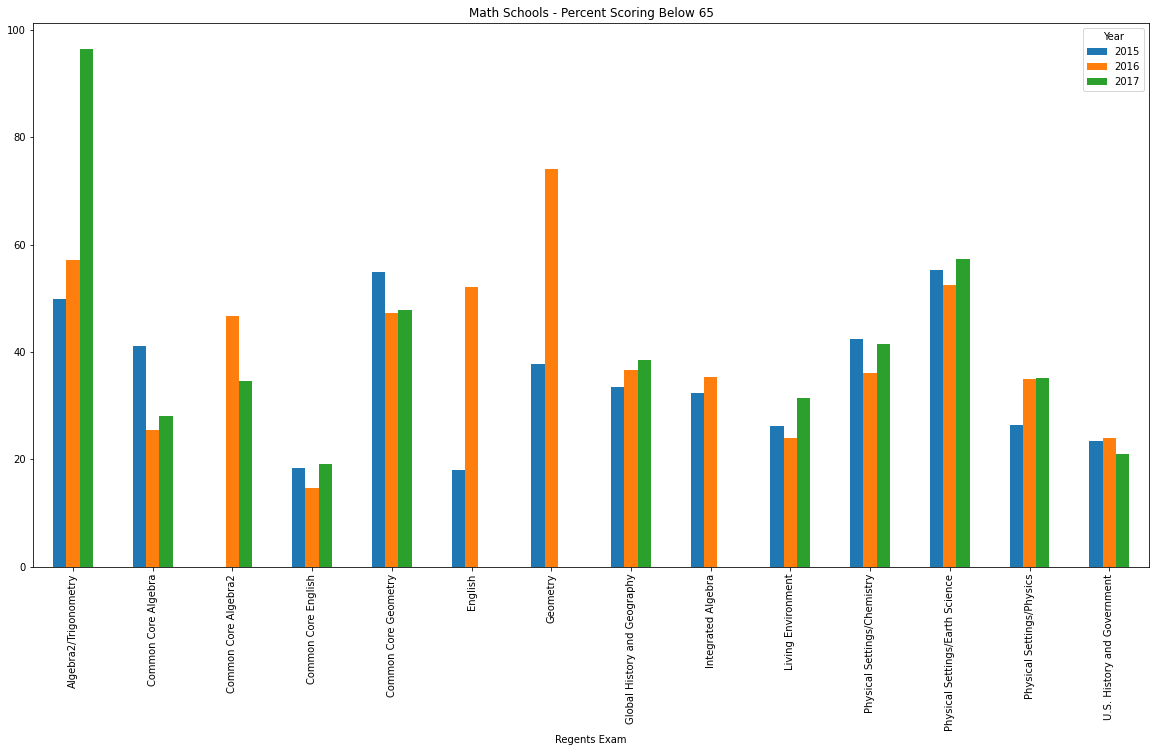

In [49]:
df_math_below65.plot.bar(figsize = (20, 10), title = 'Math Schools - Percent Scoring Below 65')

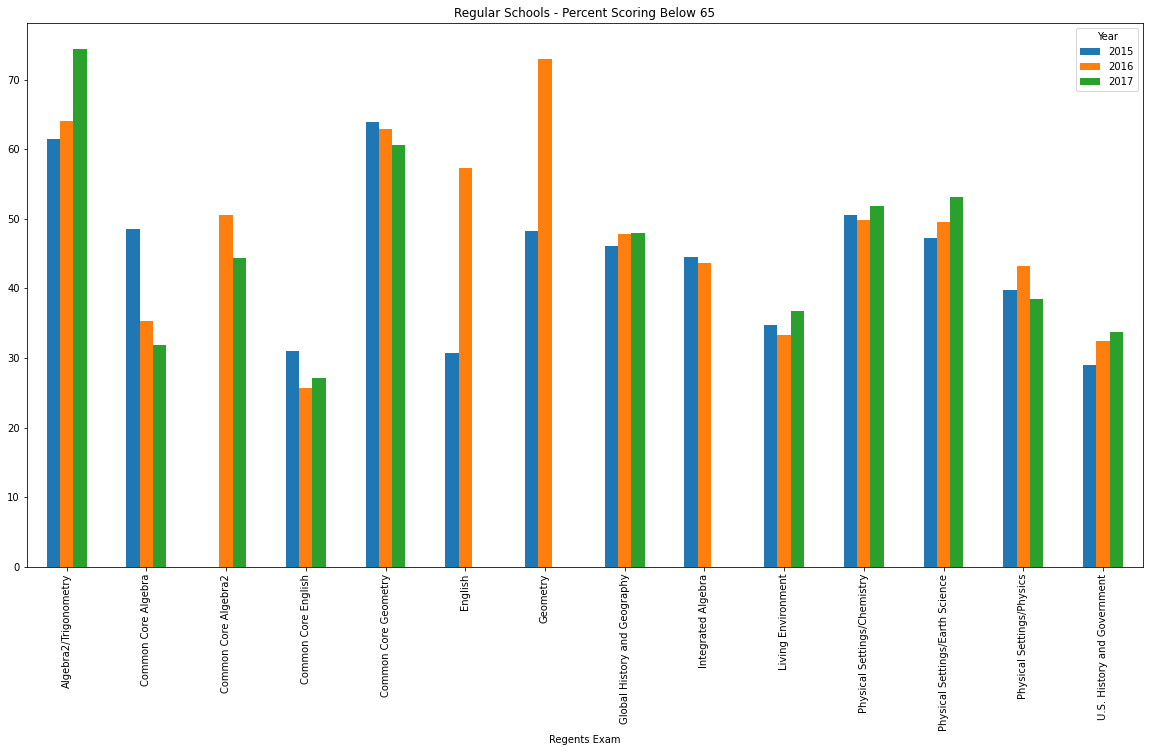

In [50]:
df_reg_below65.plot.bar(figsize = (20, 10),title = 'Regular Schools - Percent Scoring Below 65')